# Mathematical morphology

The goal of this homework is to study basics concepts related to mathematical morphology (structuring elements, erosion, dilation, opening, closing, operators by reconstruction). Let us first load the necessary packages for this laboratory. 



In [2]:
!pip install plotly==5.6.0 matplotlib==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 81.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


Upload the "Data.zip" in the session storage (using the "Files" and "Upload" options on the upper left part of the browser). The Archive contains the image material corresponding to this lab. 

Once the upload is done, decompress the archive.

In [3]:
!unzip Data.zip

Archive:  Data.zip
  inflating: Mark.bmp                
  inflating: Shape.jpg               
  inflating: Tools.bmp               
   creating: Woven/
 extracting: Woven/woven_0116.jpg    
 extracting: Woven/woven_0088.jpg    
 extracting: Woven/woven_0038.jpg    
 extracting: Woven/woven_0007.jpg    
 extracting: Woven/woven_0004.jpg    
 extracting: Woven/woven_0005.jpg    
 extracting: Woven/woven_0015.jpg    
 extracting: Woven/woven_0029.jpg    
 extracting: Woven/woven_0002.jpg    
 extracting: Woven/woven_0013.jpg    
 extracting: Woven/woven_0017.jpg    
 extracting: Woven/woven_0001.jpg    
 extracting: Woven/woven_0016.jpg    
 extracting: Woven/woven_0014.jpg    
 extracting: Woven/woven_0003.jpg    
 extracting: Woven/woven_0012.jpg    
 extracting: Woven/woven_0028.jpg    
 extracting: Woven/woven_0011.jpg    
 extracting: Woven/woven_0039.jpg    
 extracting: Woven/woven_0010.jpg    
 extracting: Woven/woven_0117.jpg    
 extracting: Woven/woven_0103.jpg    
 extracting

## 1 Structuring elements
The morphological equivalent to the notion of impulse response is the structuring element. To precisley study erosion and dilation, the  [scipy.ndimage](https://docs.scipy.org/doc/scipy-0.18.1/reference/ndimage.html) package will be used in this section. It contains various functions for multi-dimensional image processing including basic morphological transforms. Moreover, it precisely controls the padding used for morphological filtering and the structuring element definition.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy   import ndimage
from skimage import io, transform

def display_image(img, title='', size=None):
  #plt.subplot(1,2,1)
  plt.gray()
  h = plt.imshow(img, interpolation='none', vmin=0, vmax=1)
  if size:
    dpi = h.figure.get_dpi()/size
    h.figure.set_figwidth(img.shape[1] / dpi)
    h.figure.set_figheight(img.shape[0] / dpi)
    h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)
    h.axes.set_position([0, 0, 1, 1])
    h.axes.set_xlim(-1, img.shape[1])
    h.axes.set_ylim(img.shape[0], -1)
  plt.grid(False)
  plt.title(title)  
  plt.show()

In this session, three flat structuring elements are used: "Flat" here means that the values of the structuring elements are either 0 or $-\infty$. The locations where the values are equal to 0 define a mask or a window below which the image values are observed and processed. In python, instead of using 0 and $-\infty$, the mask is created with values at 1 and 0 respectively.     
* The first structuring element, se1, is a square of size 7x7. The space origin is at the center of the structuring element. 
* The second structuring element, se2, contains only two points on the border of the 7x7 window. **You will have to define these two points** in such a way that the line they form does not pass over the center on the structuring element (that is the space origin). 
* Finally, the structuring element se3 is a vertical segment of length 11. The space origin is at the center of the segment.

In [5]:
se1 = np.ones((7,7))

se2 = np.zeros((7,7))
se2[0,0]=1    # Choose the 2 locations included in the structuring element  
se2[0,6]=1    # such that they are at the border of the 7x7 square and 
              # the line they form does not pass over the center of the 
              # structuring element
    
se3 = np.zeros((11,11))
se3[:,5] = 1

print("se1")
print(se1)
print("se2")
print(se2)
print("se3")
print(se3)

se1
[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]
se2
[[1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
se3
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


We are going to analyze the morphological content of the "Shape.jpg" image. Let us read it so that you can process it. We will aslo resize it. 


In [6]:
ima = io.imread('Shape.jpg',as_gray=True)
ima = transform.resize(ima,(512, 512),mode='reflect') 
ima.shape

(512, 512)

Visualize the image

<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


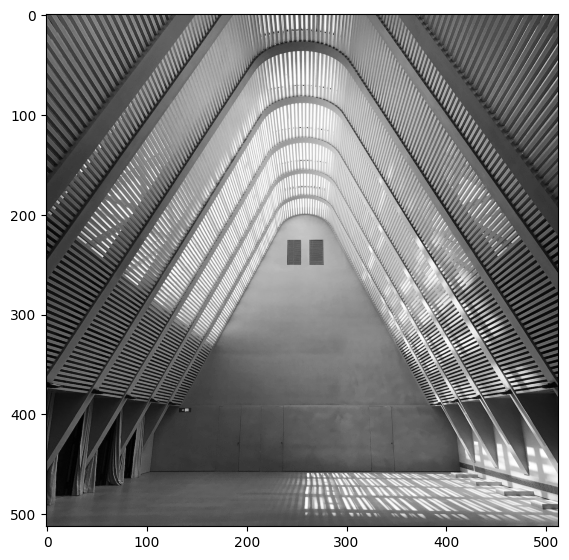

In [7]:
display_image(ima,size=1)

Compute the maximum and minimum gray level value of the image. This information will be used to define the padding. 

In [8]:
maxval = np.amax(ima)
minval = np.amin(ima)
print("Max=",maxval,", Min=",minval)

Max= 0.9995858612831748 , Min= 0.0033481194751113193


## 2 Erosion and Dilation
The two basic operators created in a lattice are the dilation and the erosion. Compute the erosion and dilation of the image with the  structuring element se1. The mode='constant' indicates that a constant padding is done outside the image with a value defined by cval. In order to avoid noticing the influence of the padding, in the case of the dilation  (erosion), the padding value is defined as minval (maxval). For example, in the case of dilation a max will be computed and the values inside the image will always be greater than or equal to minval. 

Note: In order to precisely see the image content, you may modify the size parameter involved in the display_image call.


<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


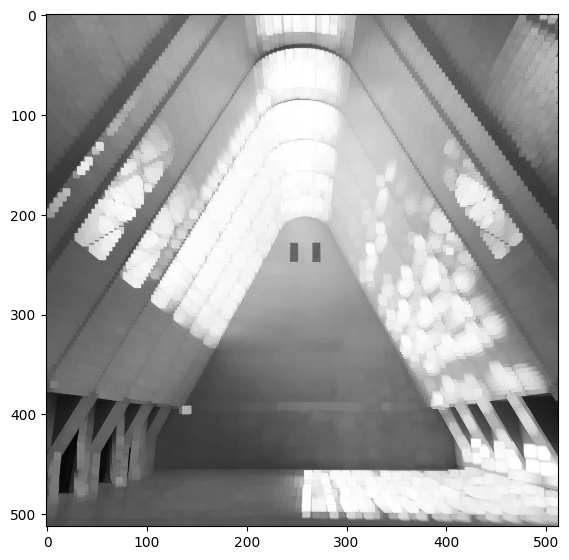

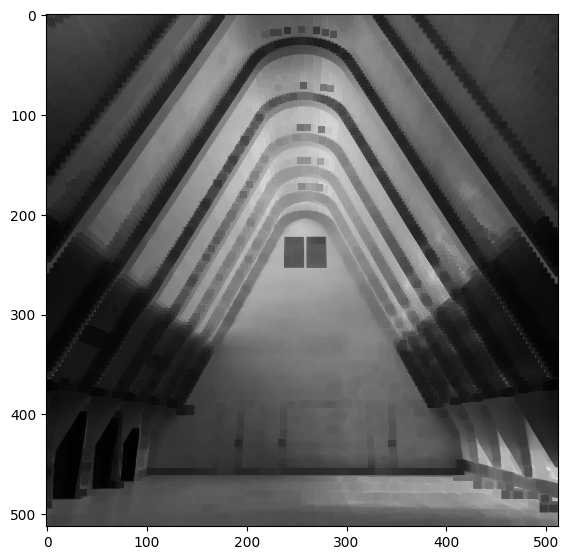

In [9]:
ima_dil1 = ndimage.grey_dilation(ima, footprint=se1, mode='constant', cval=minval)
ima_ero1 = ndimage.grey_erosion (ima, footprint=se1, mode='constant', cval=maxval)

display_image(ima_dil1,size=1)
display_image(ima_ero1,size=1)

<font color='purple'> Describe intuitively the processing results: </font>

---
<font color='red'>Answer: La dilatació substitueix els píxels amb valor petit (negres). Per tant, l'imatge guanya lluminositat. En canvi, l'erosíó eliminia els píxels amb valor elevat (blancs) i per tant enfosqueix l'imatge. En aquest cas concret, elimina els reflexes de llum que entren per la finestra. A més a més, com que estem utilitzant un element estructurant de tamany gran, les dues imatges perden qualitat i queden conjunts de píxels amb valor uniforme del tamany de l'element estrucurant (7x7).
</font> 

Do the same experiment with se2

<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


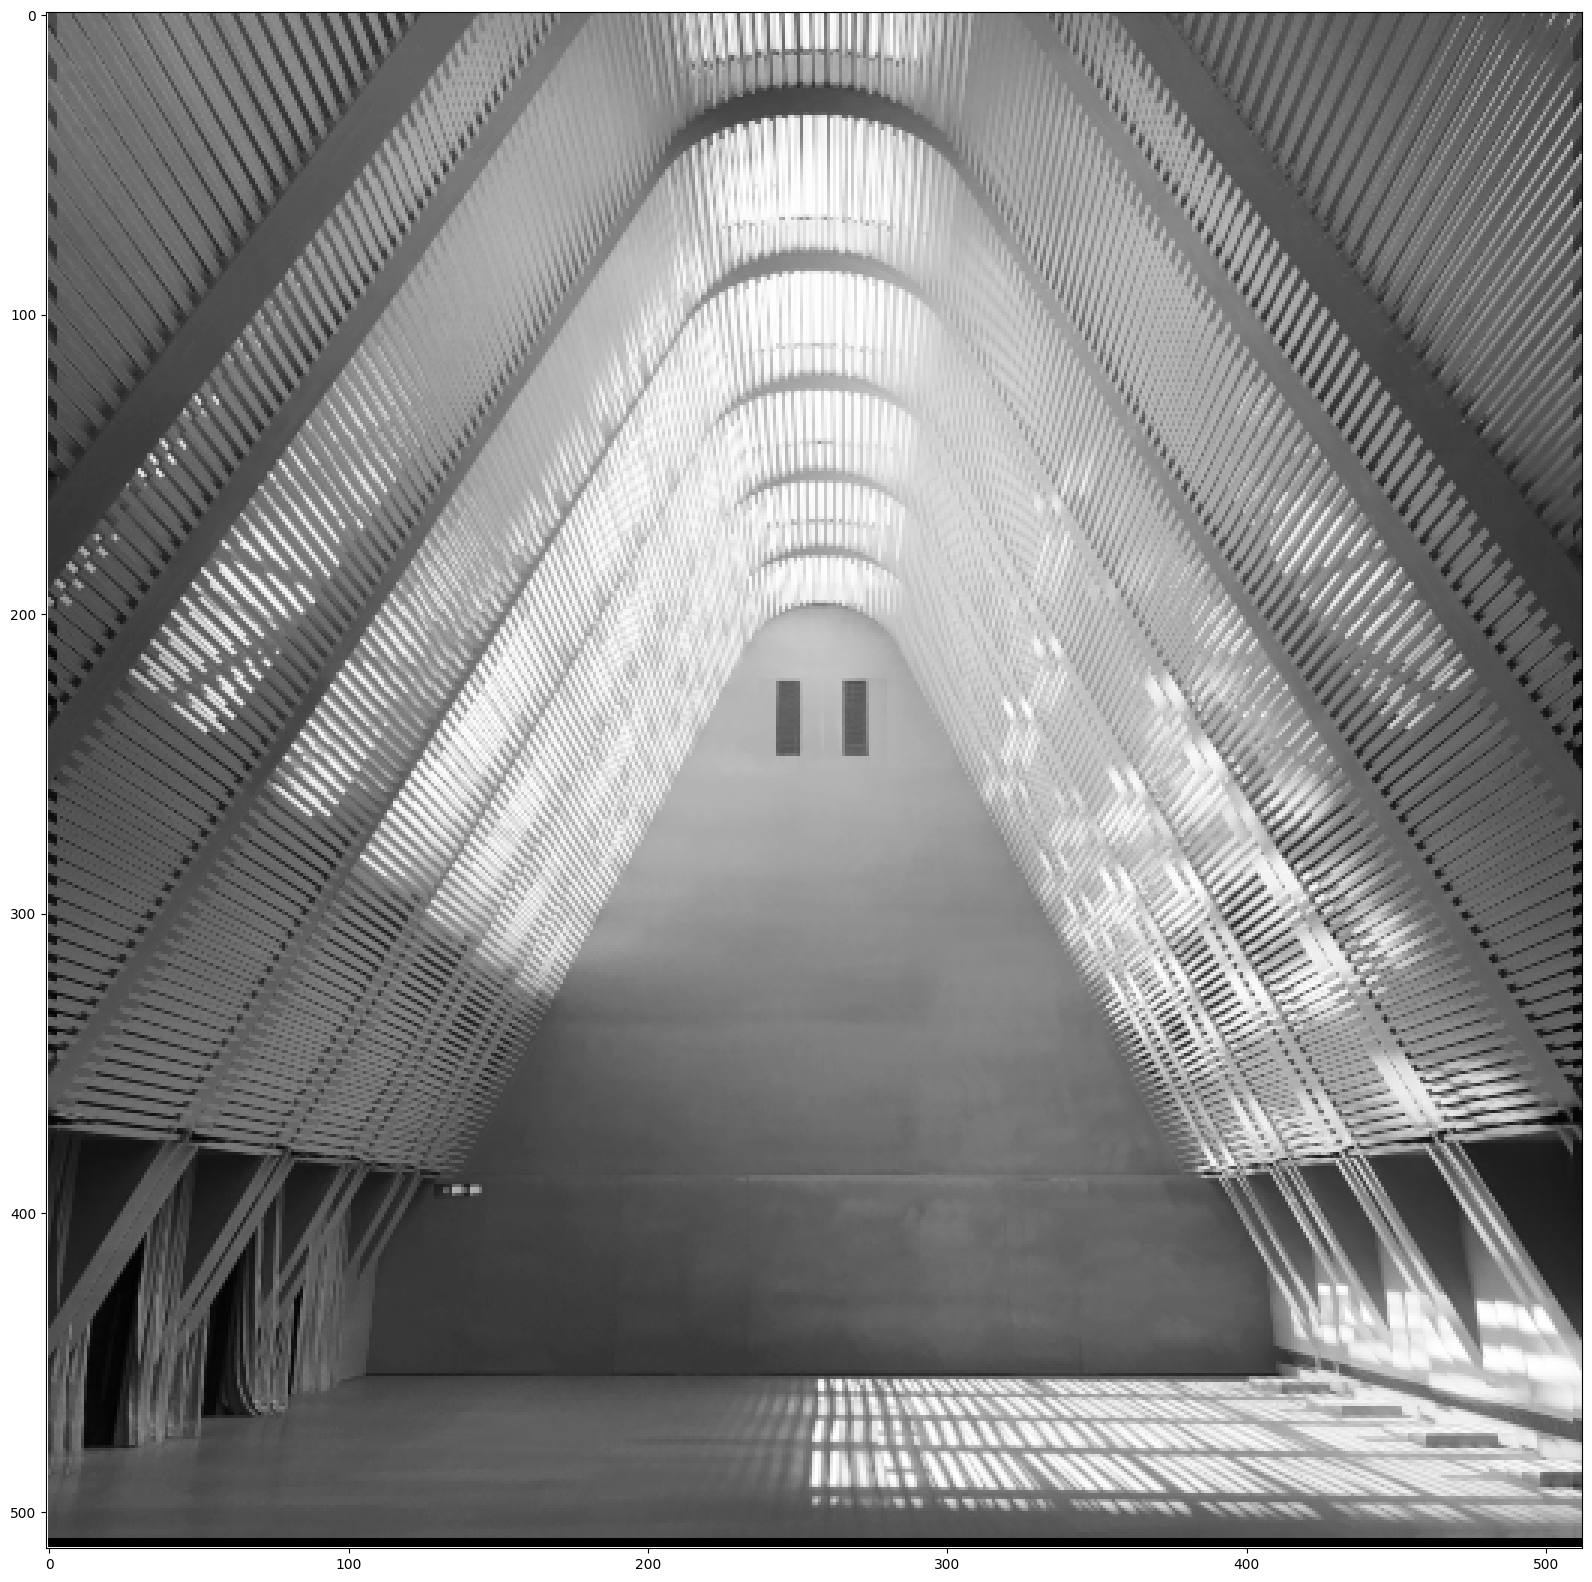

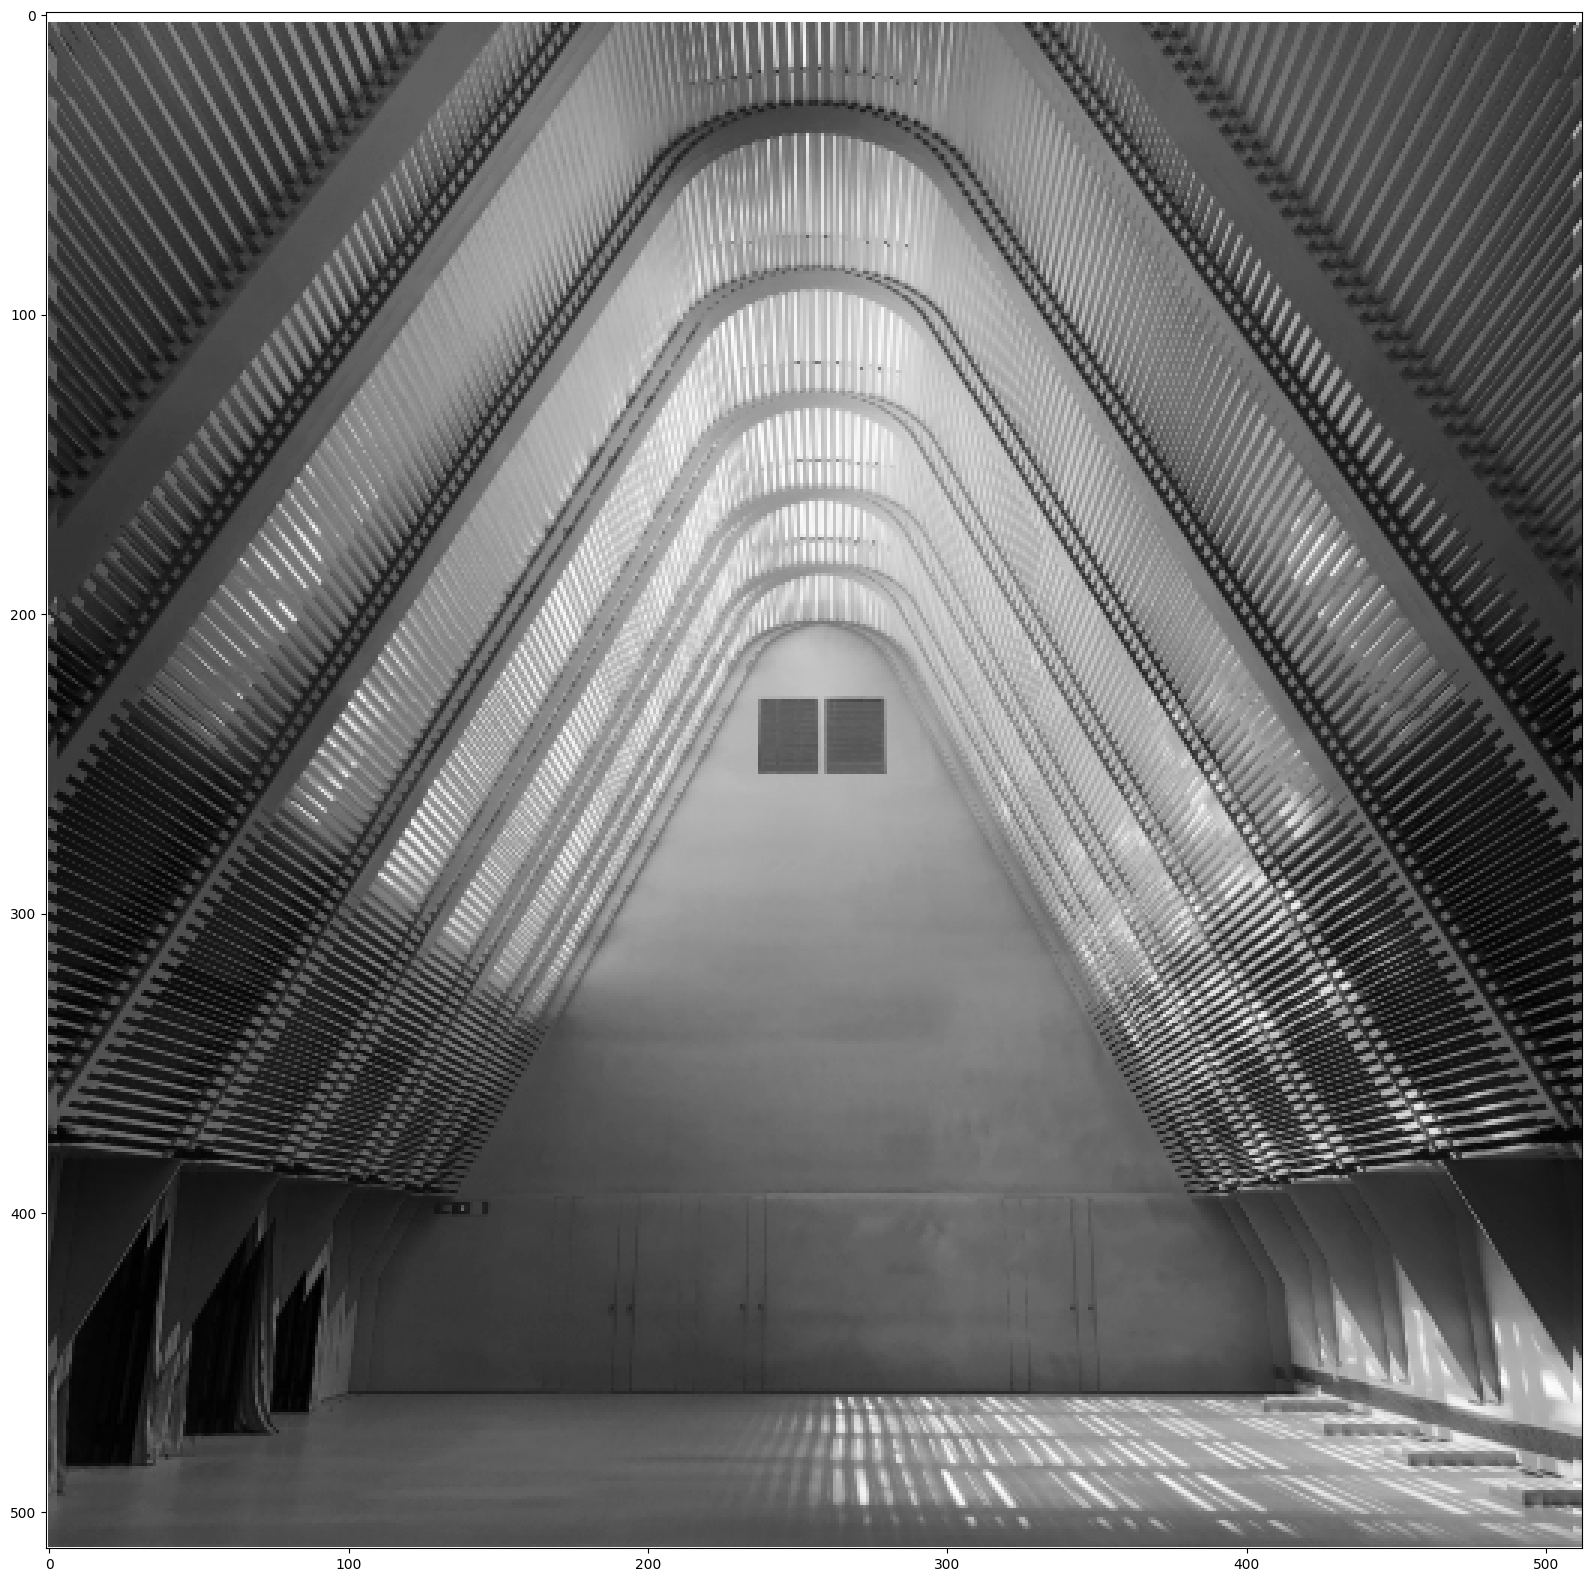

In [10]:
ima_dil2 = ndimage.grey_dilation(ima, footprint=se2, mode='constant', cval=minval)
ima_ero2 = ndimage.grey_erosion (ima, footprint=se2, mode='constant', cval=maxval)

display_image(ima_dil2,size=3)
display_image(ima_ero2,size=3)

<font color='purple'> Describe intuitively the processing results. Here in particular, we suggest to visualize the image after a strong zooming so that you can precisely observe what is going on. Look in particular at the four corners of the image.... some surprising gray level values are appearing in some of the image corners. Interpret why they are appearing and justify their number as well as gray level values.  : </font>

---
<font color='red'>Answer: Si utilitzem se2, la dilatació i l'erosió produeixen en el mateix efecte però en menor mesura. Ara, però, en el cas de la dilatació veiem una banda negra horitzontal a la part inferior de l'imatge mentre que amb l'erosió veiem una banda blanca horitzontal a la part superior. 
    
<font color='red'> En el cas de la dilatació l'efecte es produeix pel següent.
    
<font color='red'>  1 ) L'element estructurant es gira en les dues dimensions i per tant l'element estrucutrant queda de la següent forma: 
    
     [0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0.]
     [1. 0. 0. 0. 0. 0. 1.]
    
<font color='red'> 2) Per tant, en trobar-nos a les últimes 6 files de l'imatge, l'element estructurant es multiplicarà exclusivament per el valor mínim afegit per tal que l'operació sigui realitzable i no pas amb cap real de l'imatge. El valor del padding està definit al paràmetre cval i tal com podem veure és el mínim de la imatge.
  
<font color='red'> En el cas de l'erosió l'element estructurant queda intacte, és a dir:
   
     [1. 0. 0. 0. 0. 0. 1.]
     [0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0.]
     [0. 0. 0. 0. 0. 0. 0.]

<font color='red'> Per tant, ara es veuran afectades les primeres 6 files de l'imatge pel mateix motiu que amb l'erosió (l'element estructurant només s'està multiplicant pel padding). Però en aquest cas, a diferència de amb la dilatació, el valor dels píxels del padding seran el valor màxim per la mateixa raó que amb l'erosió era el mínim i, per tant, la banda serà de color blanc. 
    
 
</font> 

Do the same experiment with se3

<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


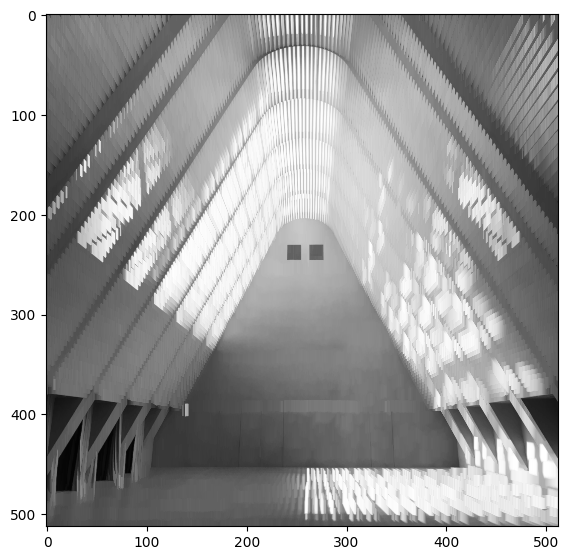

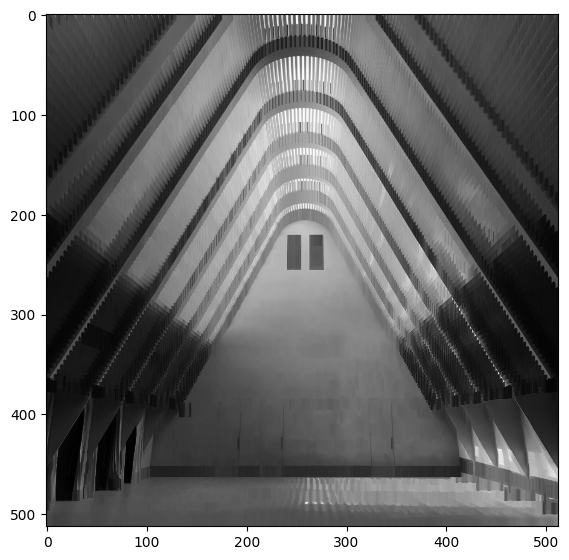

In [11]:
ima_dil3 = ndimage.grey_dilation(ima, footprint=se3, mode='constant', cval=minval)
ima_ero3 = ndimage.grey_erosion (ima, footprint=se3, mode='constant', cval=maxval)

display_image(ima_dil3,size=1)
display_image(ima_ero3,size=1)

<font color='purple'> Describe intuitively the processing results: </font>

---
<font color='red'>Answer: L'element estrucutrant que estem utilitzant és una recta vertical i per tant es perden les formes de les línies horitontals. Aixó es pot veure clarament amb les llistons de les finestres. 
</font> 


## 3	Study of the properties of the erosion and of the dilation

1)	The composition or erosions (or of dilations) is equivalent to an erosion (or dilation). 

<font color='purple'> Based on this property, compute the erosion and the dilation of ima with a rectangular structuring element of size 13x23 (13 in horizontal and 23 in vertical) combining "ndimage.grey_dilation( )" and "ndimage.grey_erosion( )"  with se1, se2 and/or se3 (you are not allowed to create a new structuring element, but only to concatenate operations). Use the cell below to write the necessary commands:  </font>

<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


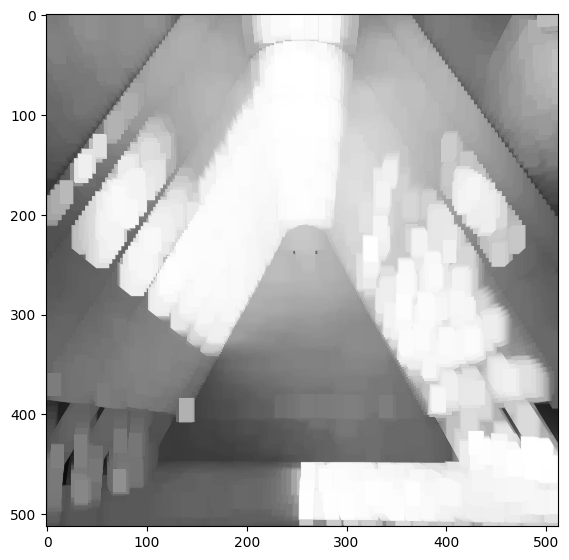

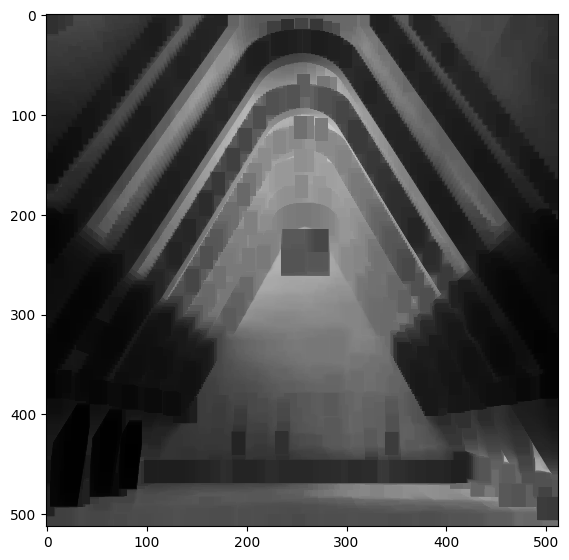

In [12]:
# Compute an erosion and a dilation combining elementary erosions and dilations 
# with se1, se2, and/or se3 

#Erosion
ima_dil_13_23 = ndimage.grey_dilation(ima, footprint=se1, mode='constant', cval=minval)
ima_dil_13_23 = ndimage.grey_dilation(ima_dil_13_23, footprint=se1, mode='constant', cval=minval)
ima_dil_13_23 = ndimage.grey_dilation(ima_dil_13_23, footprint=se3, mode='constant', cval=minval)
    
#Dilation
ima_ero_13_23 = ndimage.grey_erosion(ima, footprint=se1, mode='constant', cval=maxval)
ima_ero_13_23 = ndimage.grey_erosion(ima_ero_13_23, footprint=se1, mode='constant', cval=maxval)
ima_ero_13_23 = ndimage.grey_erosion(ima_ero_13_23, footprint=se3, mode='constant', cval=maxval)

display_image(ima_dil_13_23,size=1)
display_image(ima_ero_13_23,size=1)


<font color='purple'> Describe and justify the strategy you have been using:  </font>
  
  
---
<font color='red'>Answer: Per conseguir un element estructurant 13x23 hem de concatenar els elements estructurants que ja disposem. Per fer-ho, sabem que concatenar dos elements estructurants de tamany $(X_1, Y_1)$ i $(X_2,Y_2)$ resulta en un element estructurant de tamany  $(X_1+X_1 - 1,Y_2+Y_2 - 1)$. Per tant, sabem que concatenar dos elements estructurants se1, de tamany 7x7, resultarà en un element de tamany 13x13, i si aquest element el concatenem amb un element estructurant se3 de tamany 1x11 arribarem al element estructurant de tamany 13x23 que buscavem.
  
</font> 



2)	The dilation is extensive if and only if the space origin belongs to the structuring element. 

<font color='purple'> To verify this property, compute the difference between the input ant the output of a dilation and study the dynamical range of this difference. Analyze the cases of se2 and se3:  </font>


In [13]:
difference_se2 = ima_dil2 - ima;
print("Difference: max", np.amax(difference_se2), ", min", np.amin(difference_se2))

difference_se3 = ima_dil3 - ima;
print("Difference: max", np.amax(difference_se3), ", min", np.amin(difference_se3))

Difference: max 0.8593314248327619 , min -0.7438231470148287
Difference: max 0.8496315705644597 , min 0.0


<font color='purple'> What conclusions can be drawn from the figures obtained in the cell above?  </font>

---

<font color='red'>Answer: Fent els càlculs pertinents, veiem que l'element estrucutrant se2 no és extansiu ja que l'espai d'origen (índex de la matriu [3,3]) no forma part del propi element estrucutrant. En canvi, se3 sí que compleix aquesta propietat i per tant sí que és extensiu
  
</font> 

## 4 Opening and closing
The morphological opening and the morphological closing are created from the composition of erosion and dilation.

<font color="purple">Compute an opening and a closing on ima with se1. Create the opening and the closing from "ndimage.grey_dilation( )" and "ndimage.grey_erosion( )". Display them. Use the cell below to write the necessary commands. </font>


<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


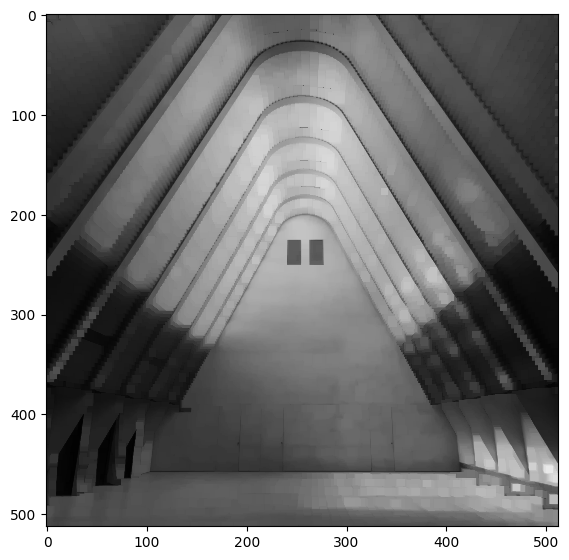

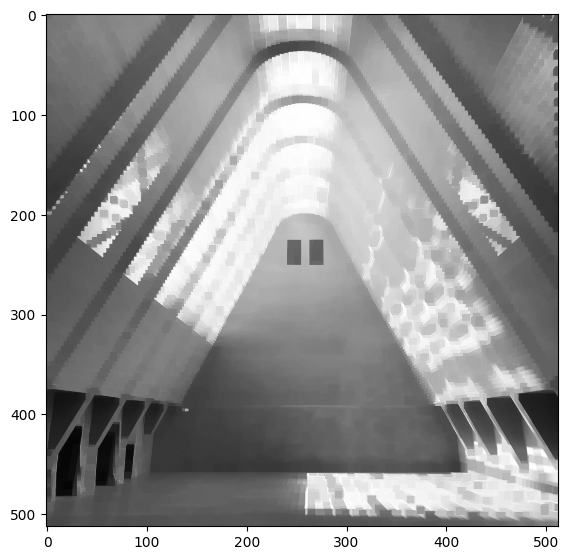

In [14]:
# Compute an opening and a closing by combining elementary erosion and dilation

#Closing
ima_clos = ndimage.grey_erosion(ima, footprint=se1, mode='constant', cval=maxval)
ima_clos = ndimage.grey_dilation(ima_clos, footprint=se1, mode='constant', cval=minval)
    
#Opening
ima_open = ndimage.grey_dilation(ima, footprint=se1, mode='constant', cval=minval)
ima_open = ndimage.grey_erosion(ima_open, footprint=se1, mode='constant', cval=maxval)


display_image(ima_clos,size=1)
display_image(ima_open,size=1)

<font color='purple'> Describe intuitively the processing effect:  </font>

---

<font color='red'>Answer: En el cas de closing l'imatge s'enfosqueix degut a que estem fent primer de tot una erosió (eliminem valors de píxels alts) tot i que no desprès fem una dilatació. Per tant, estem "expandint" els valors més alts dels valors que NO hem eliminat. Per l'obertura el procés és exactament l'invers. Primer eliminem els valor baixos fent una dilatació i després ens quedem amb els valors més baixos dels valors alts que en haviem quedat.  
</font> 

## 5	Study of the properties of the opening and of the closing:
From now on we are going to use the skimage [skimage](http://scikit-image.org/docs/stable/api/api.html) package which also includes morphological operations. The opening (closing) can be directly computed with morphology.opening (morphology.closing). 



In [15]:
from skimage import morphology

#Example of opening and closing with skimage
ima_ope  = morphology.opening(ima,se1)
ima_clo  = morphology.closing(ima,se1)

The opening is anti-extensive, increasing and idempotent, whereas the closing is extensive, increasing and idempotent. 

<font color="purple"> Using the structuring elements se1 and the commands np.amax() and np.amin(), define two experiments to verify the properties of idempotence and anti-extensivity of the opening. Write the  code below. </font>



In [16]:
# Write the code to verify that an opening is idempotent

ima_clo1  = morphology.closing(ima,se1)
ima_clo2  = morphology.closing(ima_clo1,se1)

if((ima_clo1 == ima_clo2).all()):
    print("Closing is idempotent")

    
# Write the code to verify that an opening is antiextensive

ima_ope  = morphology.opening(ima,se1)

if((ima_ope <= ima).all()):
    print("Opening is antiextensive")

Closing is idempotent
Opening is antiextensive


<font color='purple'> Describe your experiments and their outcome:  </font>

---

<font color='red'>Answer: Idempotence - Ho és perquè si fem dues obertures consecutives i ho comprovem píxel a píxel veiem que la imatge es idèntica. 
</font> 


<font color='red'>Answer: Anti-extensivity - Ara simplement comparem tots els pixels de la mateix posicio i veiem que o bé són iguals o més petits.

</font> 


## 6	Filters by reconstruction
Filters by reconstruction use a "marker" image to define the simplification effect. The marker is progressively dilated conditionally to the original image in order to reconstruct the contours of the components that have not been completely removed. In the sequel, we analyse the simplification effect as a function of the strategy to create the "marker" image. 

**Binary image:**
Select the reference image "Tools.bmp" and the marker image "Mark.bmp" and compute the reconstruction. Note that the marker image has to be lower or equal to the reference image (this is enforced by the np.minimum)



<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


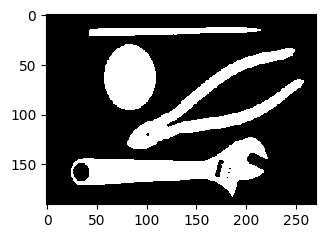

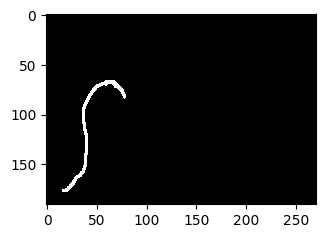

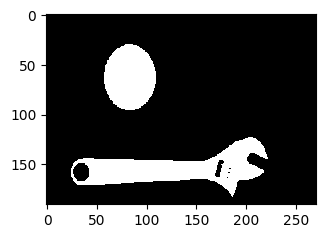

In [17]:
ref = io.imread('Tools.bmp',as_gray=True)
mar = io.imread('Mark.bmp', as_gray=True)
display_image(ref,size=1)
display_image(mar,size=1)

mar1 = np.minimum(mar,ref)
rec = morphology.reconstruction(mar1, ref, method='dilation')
display_image(rec,size=1)

<font color='purple'> Comment and justify the result:  </font>

---

<font color='red'>Answer: El marker colisiona amb dos components conexes (la clau angles i la bola) i, per tant, són les dues úniques que queden marcades i es conserven.
  
</font> 

Let us now compute the dual reconstruction. 

<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


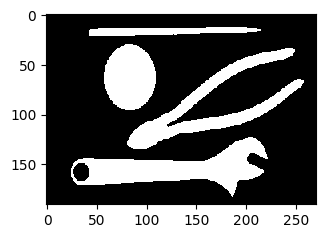

In [18]:
mar2 = np.maximum(255-mar,ref)
rec = morphology.reconstruction(mar2, ref, method='erosion')
display_image(rec,size=1)

<font color='purple'> Why did we define mar2 as a function of 255-mar? Comment and justify the dual reconstruction result:  </font>

---

<font color='red'>Answer: Per la definició de reconstrucció dual, la marca ha de ser tot alló que no ho era abans, és a dir, el fons negre ha de ser blanc i el blanc ha de ser negre, que és justament el que aconseguim amb 255-mar. Si observem ara la marca 2 veiem el seu fons només col·lisiona amb dos components conexes de l'imatge: el fons i el forat gran de la clau anglesa. Per tant, són els dos únics que queden marcats.
  
</font> 

Let us now use as marker, an image that has been derived from the reference image itself. As an example, let us use the abolute maximum (or maxima) of the gray level image "ima". 

<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


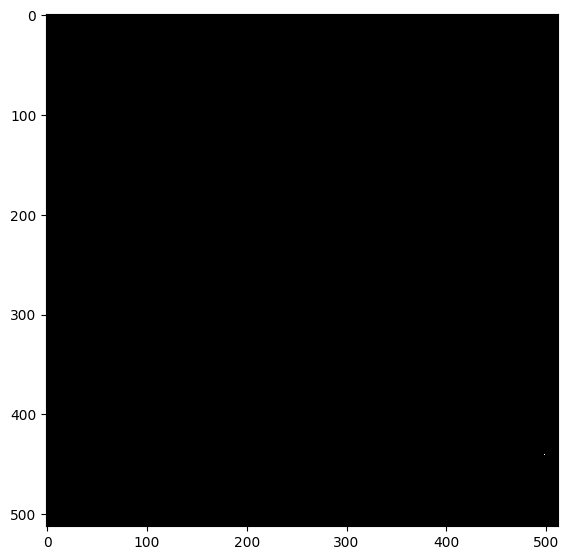

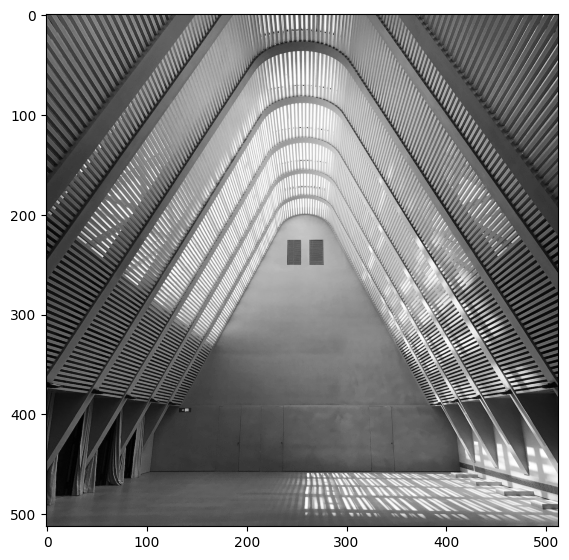

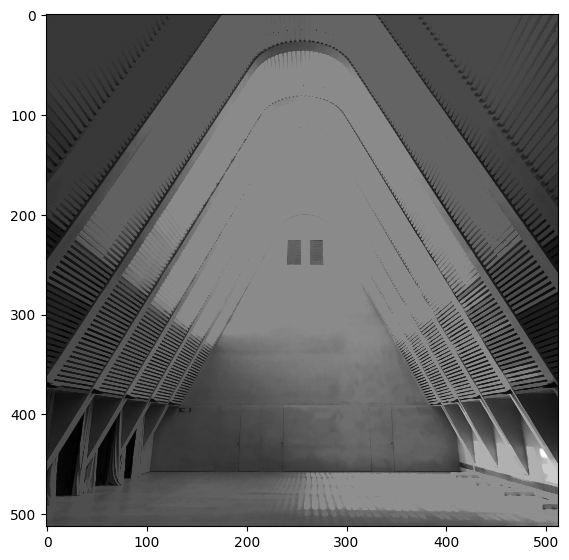

In [19]:
# Define a marker image involving only the pixels corresponding to the absolute maxima of the image
mar3 = np.copy(ima)
mar3[mar3<maxval] = 0
display_image(mar3,size=1)

# Compute the reconstruction
rec = morphology.reconstruction(mar3, ima, method='dilation')
display_image(ima,size=1)
display_image(rec,size=1)

<font color='purple'> Comment and justify the result:  </font>

---

<font color='red'>Answer: El resultat té una escala de grisos amb només valors relativament petits. L'imatge sembla enfosquida. Això és degut a que fent la reconstrucció per dilatació, en cas que els valors dels píxels de l'imatge siguin grans, ens quedarem amb els valors de la dilatació de la reconstrucció mentre que si els píxels tenen valors més petit que la dilatació de la reconstrucció, els quedarem amb els píxels originals de l'imatge.
</font> 

During the lecture, we have seen that a classical way to construct the marker image is to use an erosion on the original image. This leads to the so-called "opening by reconstruction of erosion". The following cells implement this function assuming the erosion is computed with the a new struturing element se4. 

<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


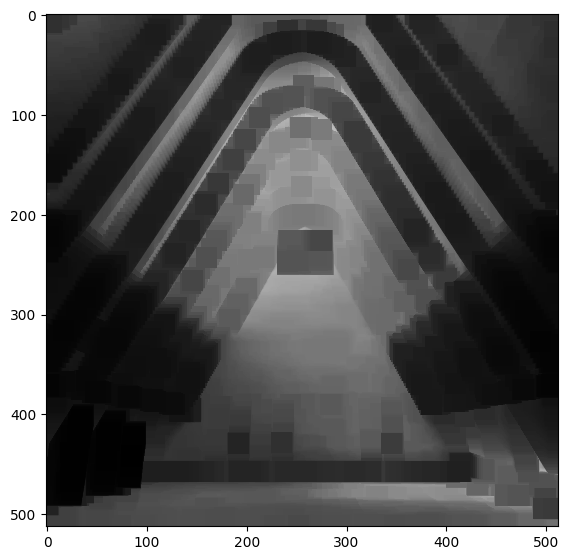

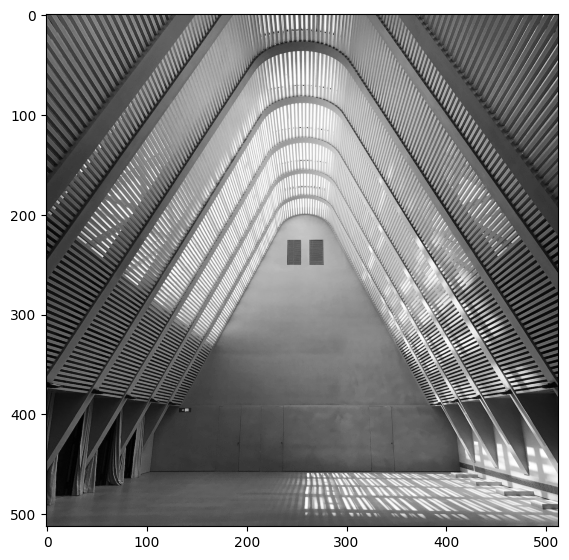

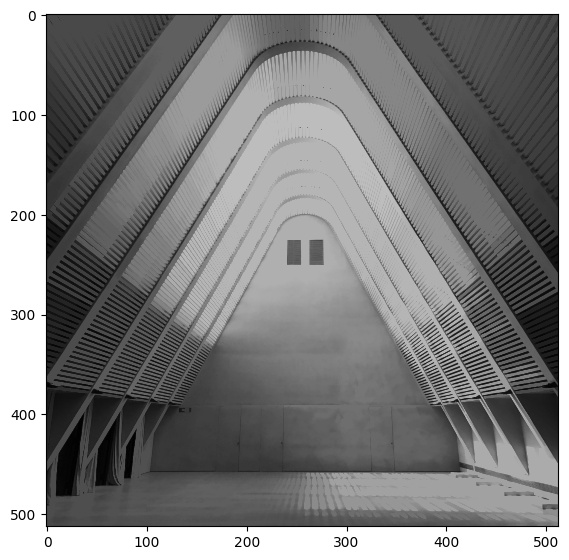

In [20]:
# Define the marker as the erosion of ima with se1
se4 = np.ones((21,21))
mar4 = morphology.erosion(ima,se4)
display_image(mar4,size=1)

# Compute the reconstruction
rec = morphology.reconstruction(mar4, ima, method='dilation')
display_image(ima,size=1)
display_image(rec,size=1)

<font color='purple'> Comment and justify the result:  </font>

---

<font color='red'>Answer: El resultat és força similar l'apartat anterior però ara l'imatge està menys atenuada i es conserven una mica millor els detalls. Aquest efecte és degut a que ara el marker té un paper diferent quan ens trobem amb píxels amb valor alts ja que la dilatació de la reconstrucció no tindrà valor tant petits i notarem menys l'efecte d'atenuació.    
</font> 

Implement now the dual operator, that is the closing by reconstruction of dilation (with se4)

<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


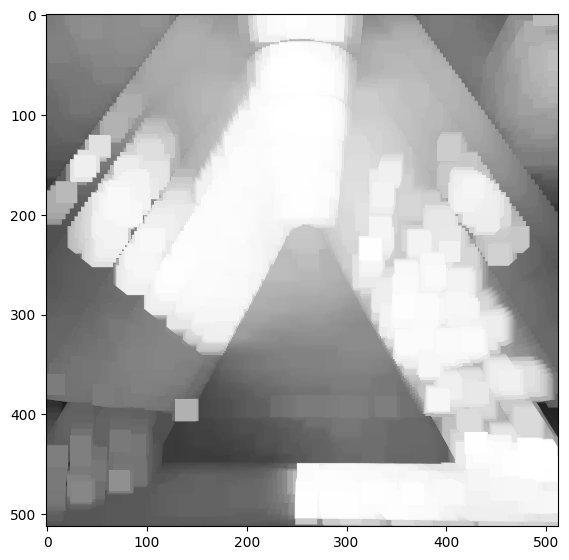

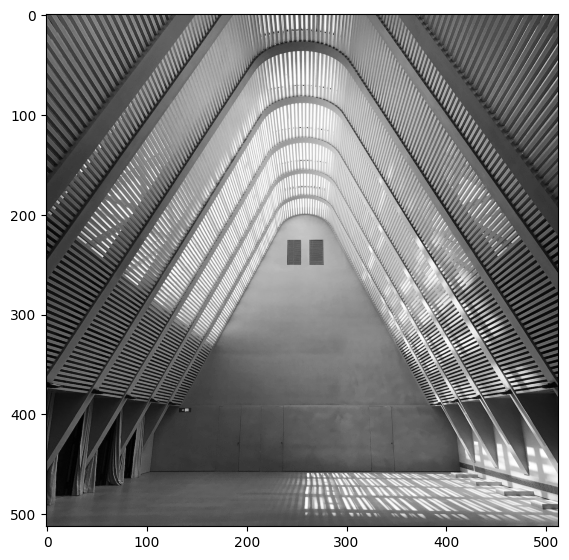

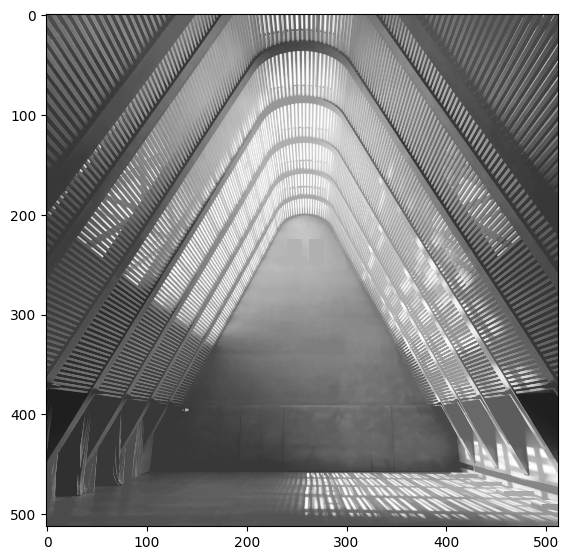

In [21]:
# Implement a closing by reconstruction of dilation
mar4_dual = morphology.dilation(ima,se4)
display_image(mar4_dual,size=1)

# Compute the reconstruction
rec = morphology.reconstruction(mar4_dual, ima, method='erosion')
display_image(ima,size=1)
display_image(rec,size=1)

<font color='purple'> Comment and justify the result:  </font>

---

<font color='red'>Answer: Ara estem l'imatge guanya lluminositat i s'eliminen objectes foscos com els objectes rectangulars del centre de l'imatge. Com que estem fent la reconstrucció dual, ara, en cas de tenir píxels de l'imatge amb valor més alt que l'erosió de la reconstrucció dual ens quedarem amb aquests valors incials mentre que en cas de tenir valors més petits que l'erosió de la reconstrucció dual ens quedarem amb aquests últims (és per aquest motiu justament que s'han eliminat els rectangles foscos del centre de la imatge)
  
</font> 

## Granulometry

In this last section, we analyze the notion of granulometrry and its potential use as texture descriptor. To this end, we will use a small texture dataset made of woven fabric images. 


Select one of the image (modify the first line of the following cell) and compute its granulormetic curve. 

<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


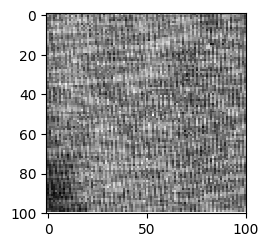

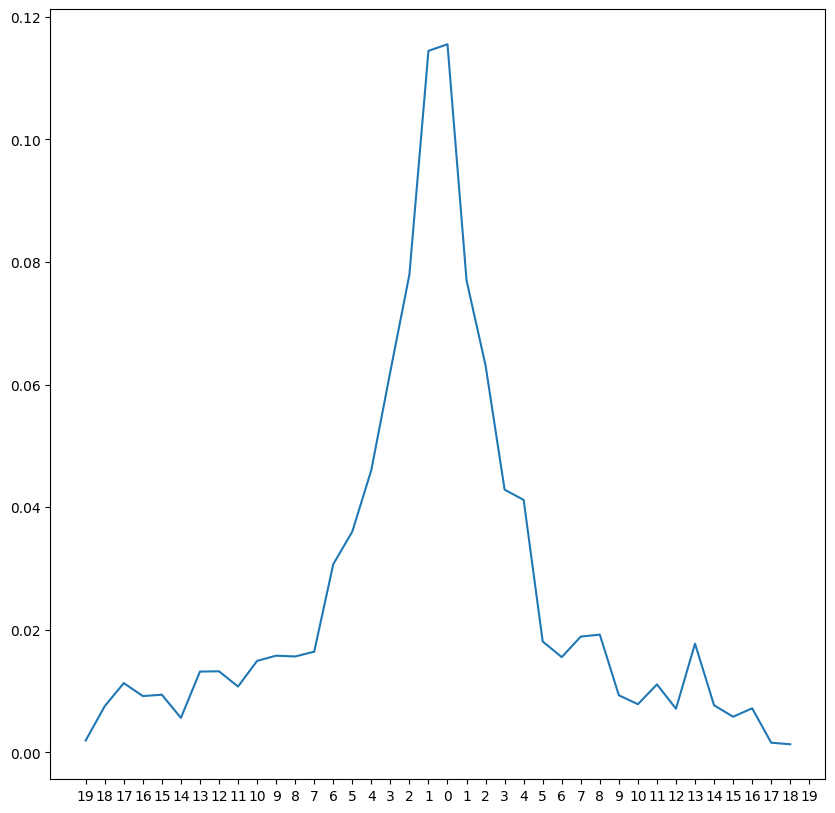

In [22]:
# Choose the image to be analysed
Texture = io.imread("Woven/woven_0012.jpg",as_gray=True)/256

# Compute the pattern sepctrum with a serie of opening and closing with a circular 
# structuring element
n=20
sizes   = np.arange(1,n,1)
val_ori   = Texture.sum()
val_open  = [morphology.opening(Texture, morphology.disk(n)).sum() for n in sizes]
val_close = [morphology.closing(Texture, morphology.disk(n)).sum() for n in sizes]
Granulometry     = np.concatenate((np.flip(val_close),[val_ori],val_open))
Pattern_Spectrum = -np.diff(Granulometry)
Pattern_Spectrum_Query = Pattern_Spectrum/Pattern_Spectrum.sum()

# Display the image and the Pattern spectrum
display_image(Texture,size=2)
plt.rcParams["figure.figsize"] = (10,10)
Axes_val = np.concatenate((np.flip(sizes),[0],sizes))
plt.xticks(np.arange(0,np.size(sizes)*2+1,1),Axes_val)
plt.plot(Pattern_Spectrum_Query)


<font color='purple'> Comment the curve and relate its shape with the image content:  </font>

---

<font color='red'>Answer: Si agafem l'imatge 12, veiem com la gran majoria de la imatge està composada per elements d'entre 5-6 píxels o menys ja que la majoria hi ha una piràmide molt pronunciada. Aquests elements són tant foscos com clars perquè podem veure una simetria bastant gran tant si fem erosió com dilatació.  
</font> 

As can be seen, the granulometry can be interpreted as a texture signature of the image. It can be used in a **Query by Example** context. 

In a Query by Example appication, the user wants to retrieve images that are similar to a query image and the only interaction consists of showing the example image to the query system. The user does not precisely describe what is meant by *retrieving similar images*. It is up to the system to define what is considered as being similar to the example provided by the user. Here we will assume that the notion of similarity is related to the size distribution and therefore to the pattern spectrum. 

Assuming that the image  you have just analyzed is the query image, the following cell computes the pattern spectrum of all images in the dataset and compute the euclidean distance between their pattern spectrum and that of the query image.


In [23]:
from scipy.spatial import distance
import glob

# List of image to be analyzed
list_of_images = sorted(glob.glob('Woven/woven*.jpg'))
dst = np.zeros(len(list_of_images))

# Compute the granulomtry
n=20
sizes   = np.arange(1,n,1)
i=0
for filename in list_of_images:
  Texture = io.imread(filename,as_gray=True)/256
  val_ori   = Texture.sum()
  val_open  = [morphology.opening(Texture, morphology.disk(n)).sum() for n in sizes]
  val_close = [morphology.closing(Texture, morphology.disk(n)).sum() for n in sizes]
  Granulometry     = np.concatenate((np.flip(val_close),[val_ori],val_open))
  Pattern_Spectrum = -np.diff(Granulometry)
  Pattern_Spectrum = Pattern_Spectrum/Pattern_Spectrum.sum()
  # Compute the euclidean distante between the pattern spectra
  dst[i] = distance.euclidean(Pattern_Spectrum, Pattern_Spectrum_Query)
  print("Image: ", filename, ",   Distance: ", dst[i])
  i=i+1

Image:  Woven/woven_0001.jpg ,   Distance:  0.1096743081116144
Image:  Woven/woven_0002.jpg ,   Distance:  0.13335985859149016
Image:  Woven/woven_0003.jpg ,   Distance:  0.09200188462435102
Image:  Woven/woven_0004.jpg ,   Distance:  0.04274147275458898
Image:  Woven/woven_0005.jpg ,   Distance:  0.11261377834863738
Image:  Woven/woven_0007.jpg ,   Distance:  0.21356431754072117
Image:  Woven/woven_0010.jpg ,   Distance:  0.023002896321465172
Image:  Woven/woven_0011.jpg ,   Distance:  0.029305164319182567
Image:  Woven/woven_0012.jpg ,   Distance:  0.0
Image:  Woven/woven_0013.jpg ,   Distance:  0.02664216023828347
Image:  Woven/woven_0014.jpg ,   Distance:  0.026028780949333807
Image:  Woven/woven_0015.jpg ,   Distance:  0.02249569802724652
Image:  Woven/woven_0016.jpg ,   Distance:  0.07707381281889886
Image:  Woven/woven_0017.jpg ,   Distance:  0.14427854289462602
Image:  Woven/woven_0018.jpg ,   Distance:  0.13406765512802193
Image:  Woven/woven_0019.jpg ,   Distance:  0.06983264

Finally, the three best matches (omiting the query image) are reported. The corresponding distances are provided (note that if these distances are rather high, the system has not really been able to identify similar images). Finally the query and the thee retrieved images are displayed.

The best marches are Woven/woven_0015.jpg Woven/woven_0010.jpg Woven/woven_0014.jpg
with distance values: 0.02249569802724652 0.023002896321465172 0.026028780949333807


<ipython-input-4-bf99a2c83248>:14: MatplotlibDeprecationWarning: The resize method was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use FigureManagerBase.resize instead.
  h.figure.canvas.resize(img.shape[1] + 1, img.shape[0] + 1)


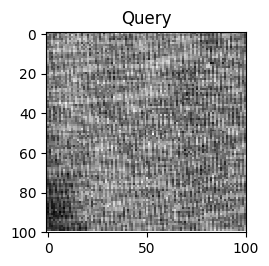

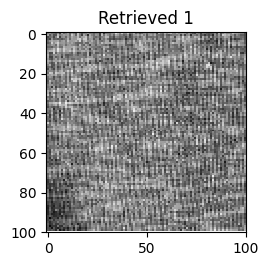

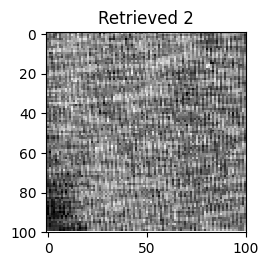

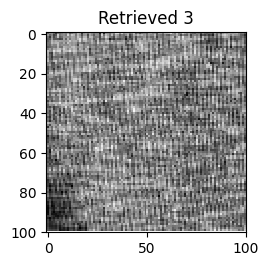

In [24]:
sort_index = np.argsort(dst)
print("The best marches are", list_of_images[sort_index[1]], 
      list_of_images[sort_index[2]],
      list_of_images[sort_index[3]])
print("with distance values:", dst[sort_index[1]], dst[sort_index[2]], dst[sort_index[3]])
display_image(io.imread(list_of_images[sort_index[0]])/256,title='Query',size=2)
display_image(io.imread(list_of_images[sort_index[1]])/256,title='Retrieved 1',size=2)
display_image(io.imread(list_of_images[sort_index[2]])/256,title='Retrieved 2',size=2)
display_image(io.imread(list_of_images[sort_index[3]])/256,title='Retrieved 3',size=2)

<font color='purple'> Make a few experiments with several query images. Analyse the outcome and comments the results of these experiments:  </font>

---

<font color='red'>Answer: En el cas de l'imatge 1 les altres imatges semblants tenen elements de la mateix magnitut el que sembla lògic tenint en compte que és en que és fixe tot i que aquests tenen diferents inclinacions de la de l'imatge 1. En el cas de l'imatge 12 senzillament recomana imatges amb elements molt petits ja que aquesta també està formada per element d'aquest tamany.
    
</font> 

---
Congratulations! You have finished this laboratory! Save the notebook and upload it in Atenea.